<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://i1.rgstatic.net/ii/institution.image/AS%3A267473364946948%401440782027167_l", align="left">
</div>
<div style="float: right; width: 30%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">UYG204 · Database Management Systems</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Name and Surname: Jose Luis Santos Durango</strong>
</div>


# Middle term project

- Select a db or you can create your own db with at least 5 tables 
- Develop an application within a platform like Java, .NET, Python 
- The app should have several forms, views etc. to select data from the db 
- You should create queries using 
    - Select statements 
    - Where conditions with several values 
    - Grouping functions 
    - Joins from several tables


# 1. How to create the database and the environment?

The first task we have to do for this project is creating the database and the users that will explore the database. For creating a database we will be using **Postgre SQL** and for creating the different tables inside this database we need skills in SQL language. The steps we need to follow to create the tables and the start schema with the ER model are listed below:

- Install PostgreSQL: https://www.postgresql.org/download/
- Once the connection is fixed on the database, let's create the database: jose_midterm_project.
- Let's create and grant permission to the users.
- Next step is droping the tables we will create on the database.
- Creating the tables and the columns they will content.
- Adding the values with the information on the tables.
- Creating the primary keys and foreign keys on the tables.

The queries used for making those steps can be found attached with this notebook in the repository: https://github.com/jose96sd/database_midterm_project.git

## Database: variant of Northwind.

The Northwind database is a sample database used by Microsoft to demonstrate the features of some of its products, including SQL Server and Microsoft Access. The database contains the sales data for Northwind Traders, a fictitious specialty foods export-import company. 

The information of this database and the values we will add into the tables can be found on this repository: https://github.com/pthom/northwind_psql/blob/master/northwind.sql

The tables we will be using for this project are:

- **categories:** it contains the info about the categories of the sold products on the different orders. It is related with the products table.
- **customers:** this table stored the info about the employees that register the orders on the order table.
- **employee_territories:** intermediary table that contains the id of territory of the employee.
- **employees:** personal information about the employees of the company.
- **order_details:** stored info for each order, about the product price and quantity.
- **orders:** more detailed info about the orders.
- **products:** info about the products that are sold on the order table.
- **region:** intermediary table that contains the region of territory of the employee.
- **shippers:** 
- **territories:** intermediary table that contains the name of territory of the employee.

## Data model of the database

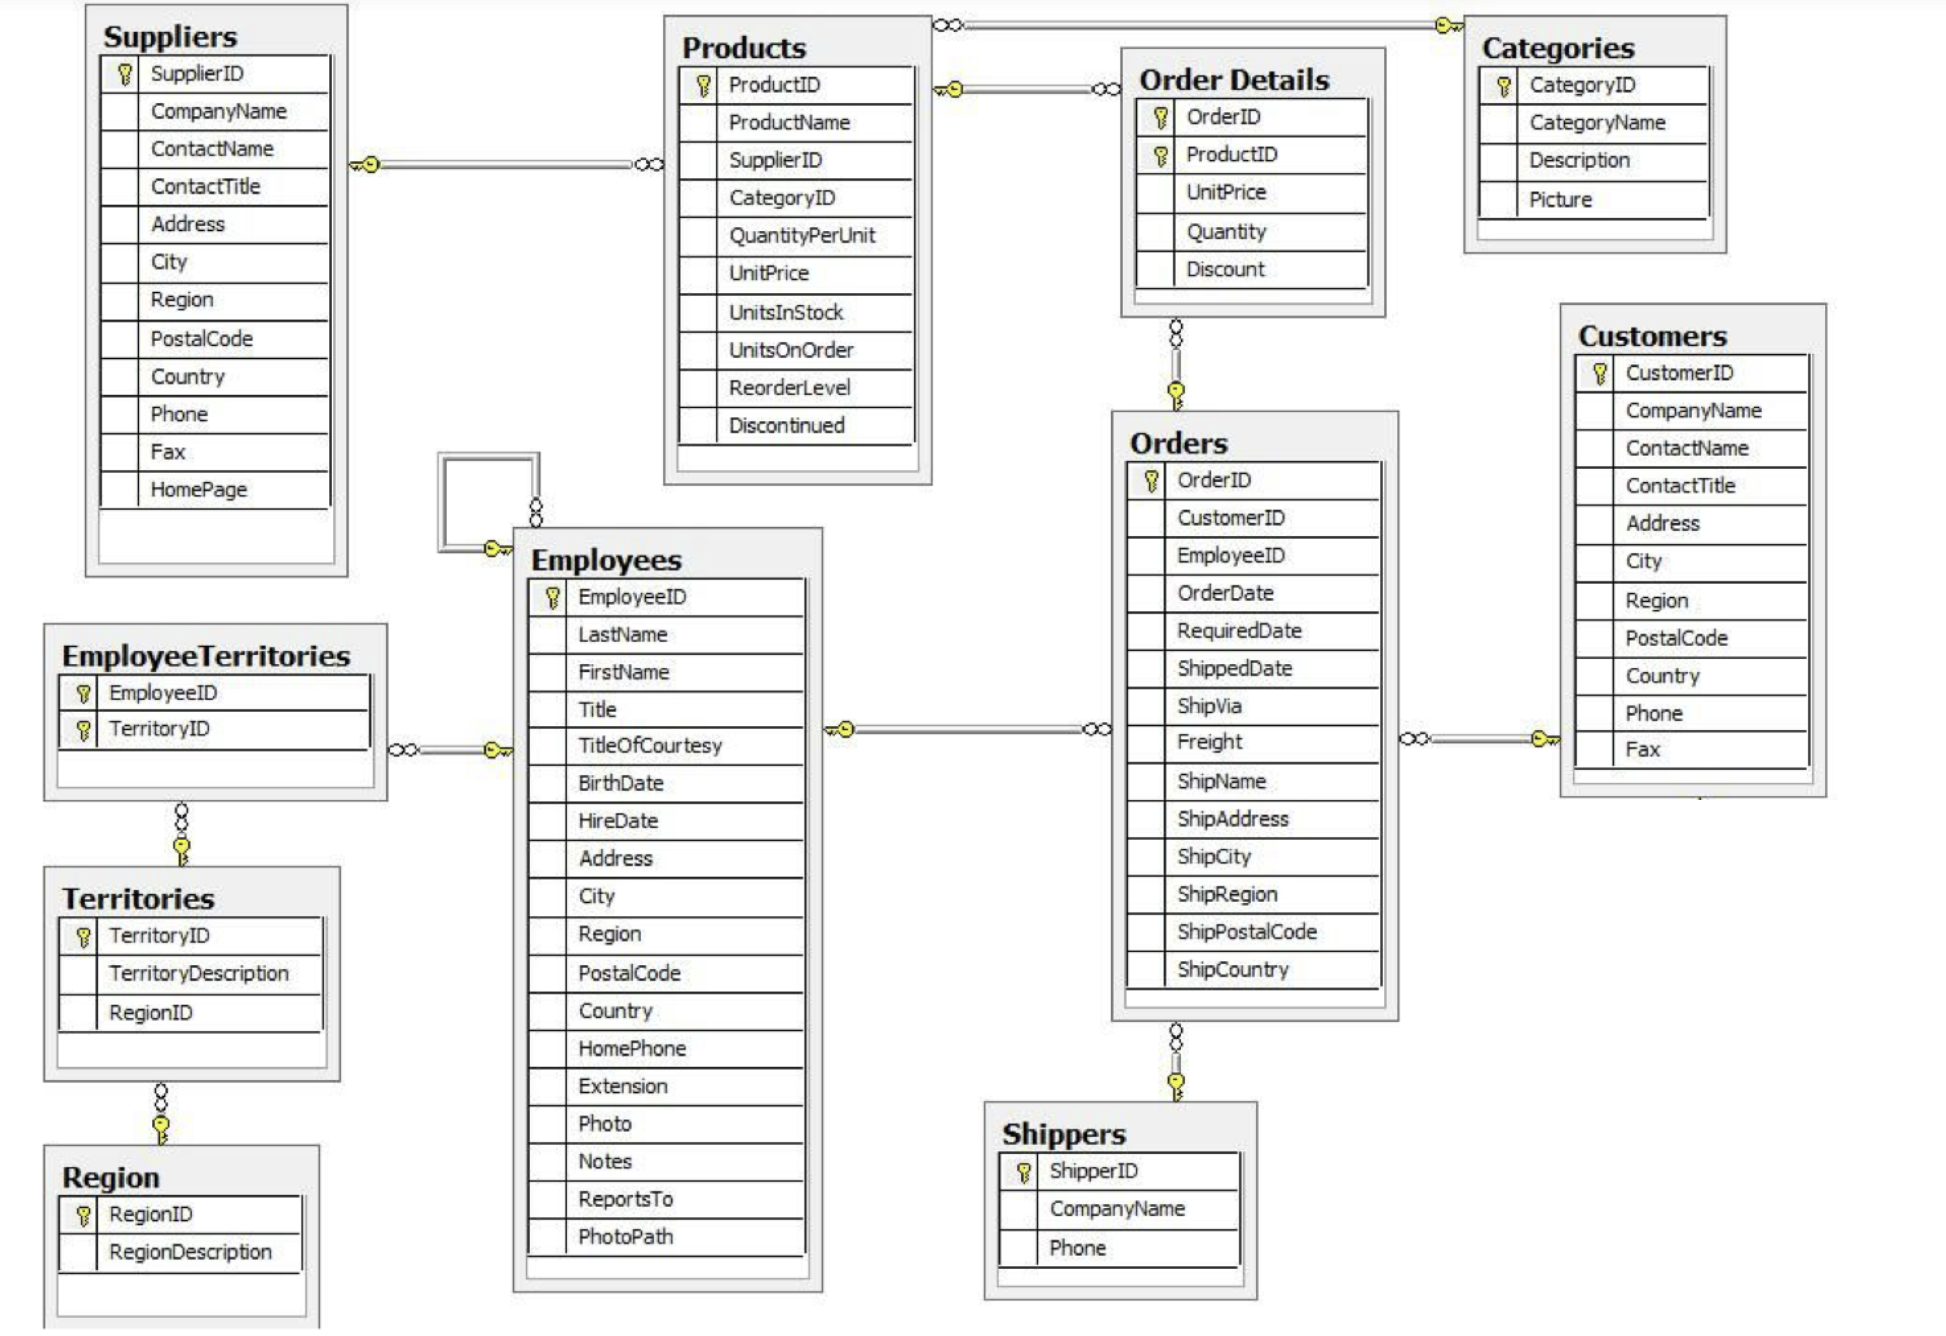


# 2. How to connect to the database via python?

We will create a connection between python and the PostgreSQL database we have created to explore the database with pandas and make some analysis to check if we can apply machine learning methods in the database: regression, supervised models, decission trees...

In [1]:
# import the module we will need for the SQL statements
import psycopg2
# import the module for creating dataframes and analysis data
import pandas as pd

# connection to the database
conn = psycopg2.connect(
    host="::1",
    database="jose_midterm_project",
    user="jose_db",
    password="aydinERASMUS"
)

# 3. Queries results

## 3.1 Query 1

Let's create the query for extracting the number of orders per country and month. The list of statements used will be:

- SELECT
- GROUP BY
- ORDER BY

In [2]:
# create a cursor for the different queries
cur = conn.cursor()

# execute the query
cur.execute("SELECT \
                ship_country AS Country, \
                DATE_TRUNC('month', order_date AT TIME ZONE 'Turkey') AS Month, \
                COUNT(order_id) AS Total_orders\
            FROM \
                orders \
            GROUP BY \
               Country, Month\
            ORDER BY \
               Country desc, Month asc \
            ")

# Get results from the query
orders = cur.fetchall()

# Let's generate the dataframe with the data of the SQL statements
orders_df = pd.DataFrame(orders, columns=[desc[0] for desc in cur.description])

## 3.3 Query 2

Let's create the query that shows the quantity of products sold and order per product. The list of statements used will be:

- SELECT
- INNER JOIN
- GROUP BY
- ORDER BY

In [3]:
# create a cursor for the different queries
cur = conn.cursor()

# execute the query
cur.execute("SELECT \
                product_name AS product, \
                SUM(quantity) AS quantity, \
                COUNT(order_id) AS Total_orders \
             FROM order_details \
             INNER JOIN products ON order_details.product_id = products.product_id \
             GROUP BY \
                product_name \
             ORDER BY \
                quantity desc \
            ")

# Get results from the query
products = cur.fetchall()

# Let's generate the dataframe with the data of the SQL statements
products_df = pd.DataFrame(products, columns=[desc[0] for desc in cur.description])

## 3.3 Query 3


Let's create a query that shows the number of products one employee sells grouped by categories of the products.

- SELECT
- INNER JOIN
- GROUP BY
- ORDER BY
- 2 TABLES

In [4]:
# create a cursor for the different queries
cur = conn.cursor()

# execute the query
cur.execute("SELECT employees.employee_id, \
                    first_name, \
                    last_name, \
                    products_sold, \
                    category_name \
             FROM employees \
             INNER JOIN \
                (SELECT employee_id, \
                       t1.order_id, \
                       SUM(order_details.quantity) AS products_sold, \
                       category_name \
                FROM orders t1 \
                INNER JOIN order_details ON t1.order_id = order_details.order_id \
                INNER JOIN products ON order_details.product_id = products.product_id \
                INNER JOIN categories ON products.category_id = categories.category_id \
                GROUP BY \
                    t1.order_id, category_name) t2 ON t2.employee_id = employees.employee_id \
            ")

# Get results from the query
employees_sells = cur.fetchall()

# Let's generate the dataframe with the data of the SQL statements
employees_sells_df = pd.DataFrame(employees_sells, columns=[desc[0] for desc in cur.description])

## 3.4 Query 4

Now, imagine we wanna get the info of the TOP 10 employees in terms of number of products sold by employee under the beverages category. We need to modify the previous query and add WHERE statement.

- SELECT
- INNER JOIN
- GROUP BY
- ORDER BY
- WHERE
- LIMIT

In [5]:
# create a cursor for the different queries
cur = conn.cursor()

# execute the query
cur.execute("SELECT employees.employee_id, \
                    first_name, \
                    last_name, \
                    SUM(products_sold) AS products_sold \
            FROM employees \
            INNER JOIN \
                (SELECT employee_id, \
                       t1.order_id, \
                       SUM(order_details.quantity) AS products_sold, \
                       category_name \
                FROM orders t1 \
                INNER JOIN order_details ON t1.order_id = order_details.order_id \
                INNER JOIN products ON order_details.product_id = products.product_id \
                INNER JOIN categories ON products.category_id = categories.category_id \
                GROUP BY \
                    t1.order_id, category_name) t2 ON t2.employee_id = employees.employee_id \
            WHERE category_name = 'Beverages' \
            GROUP BY employees.employee_id, first_name, last_name \
            ORDER BY products_sold desc \
            LIMIT 10 \
            ")

# Get results from the query
employees_sells_filtered = cur.fetchall()

# Let's generate the dataframe with the data of the SQL statements
employees_sells_filtered_df = pd.DataFrame(employees_sells_filtered, columns=[desc[0] for desc in cur.description])

## 3.5 Query 5

The next query will show the employees sales amounts per month. With the result table we can calculate who is the employee of the month in terms of sales and also the territories that has the best sellers.

- SELECT
- INNER JOIN
- GROUP BY
- ORDER BY
- 2 TABLES

In [6]:
# create a cursor for the different queries
cur = conn.cursor()

# execute the query
cur.execute("SELECT employees.employee_id, \
                    first_name, \
                    last_name, \
                    SUM(sale) AS sale_amount, \
                    DATE_TRUNC('month', t2.order_date) AS month_date \
            FROM employees \
            INNER JOIN \
                (SELECT employee_id, \
                       t1.order_id, \
                       SUM(order_details.quantity)*order_details.unit_price AS sale, \
                       order_date \
                FROM orders t1 \
                INNER JOIN order_details ON t1.order_id = order_details.order_id \
                INNER JOIN products ON order_details.product_id = products.product_id \
                GROUP BY \
                    t1.order_id,order_details.unit_price,t1.order_date) t2 ON t2.employee_id = employees.employee_id \
            GROUP BY employees.employee_id, first_name, last_name, month_date \
            ORDER BY month_date asc, sale_amount desc \
            ")

# Get results from the query
employees_month = cur.fetchall()

# Let's generate the dataframe with the data of the SQL statements
employees_month_df = pd.DataFrame(employees_month, columns=[desc[0] for desc in cur.description])

## 3.6 Query 6

Finally, if we wanna get the total sales amount for each territory, we can get some extra information from territories tables and modify the query number 5 to get it.

- SELECT
- INNER JOIN
- GROUP BY
- ORDER BY
- 3 TABLES

In [7]:
# create a cursor for the different queries
cur = conn.cursor()

# execute the query
cur.execute("SELECT territory_description, \
                    SUM(sale_amount) as territory_sale \
             FROM employee_territories \
             INNER JOIN\
                 (SELECT employees.employee_id,\
                         first_name,\
                         last_name,\
                         SUM(sale) AS sale_amount\
                 FROM employees\
                 INNER JOIN\
                 (SELECT employee_id,\
                         t1.order_id,\
                         SUM(order_details.quantity)*order_details.unit_price AS sale\
                  FROM orders t1\
                  INNER JOIN order_details ON t1.order_id = order_details.order_id\
                  INNER JOIN products ON order_details.product_id = products.product_id\
                  GROUP BY\
                  t1.order_id,order_details.unit_price) t2 ON t2.employee_id = employees.employee_id\
             GROUP BY employees.employee_id, first_name, last_name) t3 ON t3.employee_id = employee_territories.employee_id\
             INNER JOIN territories ON employee_territories.territory_id = territories.territory_id\
             GROUP BY territory_description\
             ORDER BY territory_description asc\
            ")

# Get results from the query
territories_sells = cur.fetchall()

# Let's generate the dataframe with the data of the SQL statements
territories_df = pd.DataFrame(territories_sells, columns=[desc[0] for desc in cur.description])

## 3.7 Query 7

The last query will make a table with some fields between the customers and the suppliers to check if there is any relation between them; for example if there is one customer that always buy products from the same supplier. Also let's add the shipper company name.

- SELECT
- INNER JOIN
- GROUP BY
- ORDER BY

In [8]:
# create a cursor for the different queries
cur = conn.cursor()

# execute the query
cur.execute("SELECT suppliers.company_name AS supplier_company, \
                    product_name, \
                    SUM(order_details.quantity) AS num_products, \
                    COUNT(orders.order_id) AS num_orders, \
                    customers.company_name AS customer_company, \
                    shippers.company_name AS shipper_company \
             FROM suppliers \
             INNER JOIN products ON products.supplier_id = suppliers.supplier_id \
             INNER JOIN order_details ON order_details.product_id = products.product_id \
             INNER JOIN orders ON orders.order_id = order_details.order_id \
             INNER JOIN customers ON customers.customer_id = orders.customer_id \
             INNER JOIN shippers ON shippers.shipper_id = orders.ship_via \
             GROUP BY suppliers.company_name, \
                      products.product_name, \
                      customers.company_name, \
                      shippers.company_name \
             ORDER BY product_name ASC \
            ")

# Get results from the query
companies = cur.fetchall()

# Let's generate the dataframe with the data of the SQL statements
companies_df = pd.DataFrame(companies, columns=[desc[0] for desc in cur.description])

In [9]:
# Close the query and the connector
cur.close()
conn.close()

# 4. Dataframes

In [10]:
#query1
orders_df

,country,month,total_orders
0,Venezuela,1996-07-01,2
1,Venezuela,1996-08-01,1
2,Venezuela,1996-09-01,1
3,Venezuela,1996-10-01,1
4,Venezuela,1996-11-01,1
...,...,...,...
317,Argentina,1997-12-01,1
318,Argentina,1998-01-01,2
319,Argentina,1998-02-01,3
320,Argentina,1998-03-01,3


In [11]:
#query2
products_df

,product,quantity,total_orders
0,Camembert Pierrot,1577,51
1,Raclette Courdavault,1496,54
2,Gorgonzola Telino,1397,51
3,Gnocchi di nonna Alice,1263,50
4,Pavlova,1158,43
...,...,...,...
72,Laughing Lumberjack Lager,184,10
73,Chocolade,138,6
74,Gravad lax,125,6
75,Genen Shouyu,122,6


In [12]:
#query3
employees_sells_df

,employee_id,first_name,last_name,products_sold,category_name
0,1,Nancy,Davolio,20,Grains/Cereals
1,4,Margaret,Peacock,12,Beverages
2,7,Robert,King,130,Dairy Products
3,4,Margaret,Peacock,20,Beverages
4,4,Margaret,Peacock,5,Confections
...,...,...,...,...,...
1903,4,Margaret,Peacock,80,Dairy Products
1904,1,Nancy,Davolio,2,Meat/Poultry
1905,1,Nancy,Davolio,14,Condiments
1906,2,Andrew,Fuller,18,Dairy Products


In [13]:
#query4
employees_sells_filtered_df

,employee_id,first_name,last_name,products_sold
0,1,Nancy,Davolio,1607
1,4,Margaret,Peacock,1572
2,3,Janet,Leverling,1310
3,8,Laura,Callahan,1308
4,2,Andrew,Fuller,1069
5,7,Robert,King,948
6,6,Michael,Suyama,778
7,9,Anne,Dodsworth,519
8,5,Steven,Buchanan,421


In [14]:
#query5
employees_month_df

,employee_id,first_name,last_name,sale_amount,month_date
0,4,Margaret,Peacock,12988.900162,1996-07-01 00:00:00+03:00
1,9,Anne,Dodsworth,4955.299998,1996-07-01 00:00:00+03:00
2,3,Janet,Leverling,2998.199972,1996-07-01 00:00:00+03:00
3,6,Michael,Suyama,2587.900053,1996-07-01 00:00:00+03:00
4,1,Nancy,Davolio,2018.599993,1996-07-01 00:00:00+03:00
...,...,...,...,...,...
187,1,Nancy,Davolio,7053.749973,1998-05-01 00:00:00+03:00
188,4,Margaret,Peacock,6274.999983,1998-05-01 00:00:00+03:00
189,8,Laura,Callahan,3223.359982,1998-05-01 00:00:00+03:00
190,2,Andrew,Fuller,2173.500023,1998-05-01 00:00:00+03:00


In [15]:
#query6
territories_df

,territory_description,territory_sale
0,Atlanta,213051.299480
1,Beachwood,133301.030066
2,Bedford,177749.260477
3,Bellevue,78198.099934
4,Bloomfield Hills,82963.999818
5,Boston,177749.260477
6,Braintree,177749.260477
7,Cambridge,177749.260477
8,Campbell,141295.990103
9,Cary,250187.450253


In [16]:
#query7
companies_df

,supplier_company,product_name,num_products,num_orders,customer_company,shipper_company
0,"Pavlova, Ltd.",Alice Mutton,18,1,Antonio Moreno Taquería,Federal Shipping
1,"Pavlova, Ltd.",Alice Mutton,10,1,Berglunds snabbköp,Federal Shipping
2,"Pavlova, Ltd.",Alice Mutton,30,1,Blondesddsl père et fils,Speedy Express
3,"Pavlova, Ltd.",Alice Mutton,16,1,Bon app',United Package
4,"Pavlova, Ltd.",Alice Mutton,6,1,Bottom-Dollar Markets,Federal Shipping
...,...,...,...,...,...,...
1976,Zaanse Snoepfabriek,Zaanse koeken,40,1,Ottilies Käseladen,Speedy Express
1977,Zaanse Snoepfabriek,Zaanse koeken,55,1,QUICK-Stop,Speedy Express
1978,Zaanse Snoepfabriek,Zaanse koeken,50,1,Save-a-lot Markets,Federal Shipping
1979,Zaanse Snoepfabriek,Zaanse koeken,10,1,Save-a-lot Markets,United Package


# 5. Visualization of some data

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 5.1 Query 1 analysis

The visualization that we will show here will be a line chart per month with the total number of orders for 2 countries: Spain and Portugal

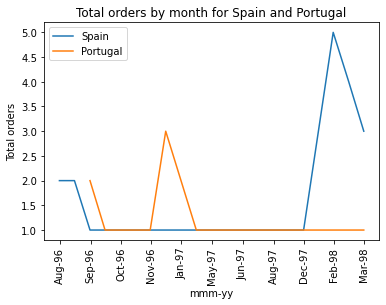

In [18]:
# filter dataframe
df = orders_df[(orders_df["country"] == 'Spain') |
               (orders_df["country"] == 'Portugal')]

# add a better format for date
df['mmm-yy'] = df["month"].dt.strftime('%b-%y')

# plot the results
data = df.groupby([pd.Grouper(key='month', freq='M'), 'country'])['total_orders'].sum().reset_index()
fig, ax = plt.subplots()
for country in data['country'].unique():
    ax.plot(data[data['country'] == country]['month'], data[data['country'] == country]['total_orders'], label=country)

# add labels and tittle
ax.set_xlabel('mmm-yy')
ax.set_xticklabels(df['mmm-yy'].unique(), rotation=90)
ax.set_ylabel('Total orders')
ax.set_title('Total orders by month for Spain and Portugal')
ax.legend()

# show the graph
plt.show()

### Conclusion:
The maximum number of orders is getting by Spain on Feb-98 with a total number of 5 sales orders.

## 5.2 Query 2 analysis

With the result dataframe from query number 2 let's create a vertical bar chart with the top 10 sold products and let's visual the average products per order for each product.

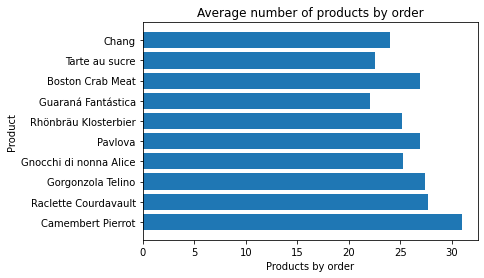

In [19]:
# order is desc by quantity, let's take 10 first rows
df = products_df.head(10)

# Let's calculate the average products per order
df['average'] = df['quantity']/df['total_orders']

# Let's plot the results
plt.barh(df['product'], df['average'])

# add labels and tittle
plt.title('Average number of products by order')
plt.xlabel('Products by order')
plt.ylabel('Product', rotation=90)

# show the graph
plt.show()

### Conclusion:
We can see that average ranking is not equal than products sold ranking. It means that for example chang products per order is higher than tarte au sucre products order, despite that for this second one there are more products sold than for the Chang product.

## 5.3 Query 7 analysis

Finally let's make an analysis to see if there is a relation on the shippers company that transport the chai products and the company that buy this product. Let's show this data in a heatmap where the colour will depends on the number of products delivered by the shipper comapny to the customer company.

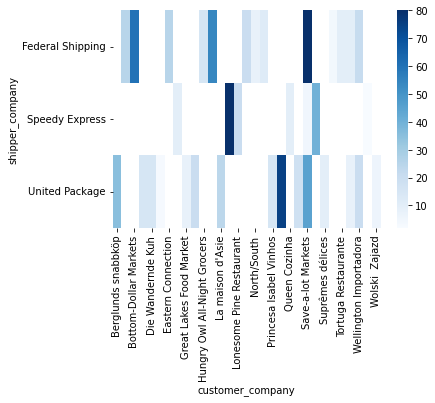

In [20]:
df = companies_df[companies_df['product_name']=="Chai"]

# pivot table
pivot_table = df.pivot('shipper_company', 'customer_company', 'num_products')

# heatmap with seaborn
sns.heatmap(pivot_table, cmap='Blues')

# show the graph
plt.show()
